# Usage example of `psytest` package

In this notebook we will demonstrate the usage of the `psytest` package for identifying bubbles in a time series following Phillips, Shi & Yu (2011). We will use simulated data to illustrate the functionality of the package.

## Simulation

We simulate a time series of $T=2000$ observations using the following model:
$$
y_t = \beta_t y_{t-1} + \epsilon_t
$$
wher $\beta_t$ follows a markov process with states $\beta=1.02$ and $\beta=0.98$. The probability of transition between stats is static and given by $1-p=0.001$. 

In [1]:
from numpy.random import seed
from psytest.utils import simulate_markov

nobs = 2_000
seed(19210201)
beta, y = simulate_markov(nobs, p=0.999, beta_list=[1.02, 0.98])

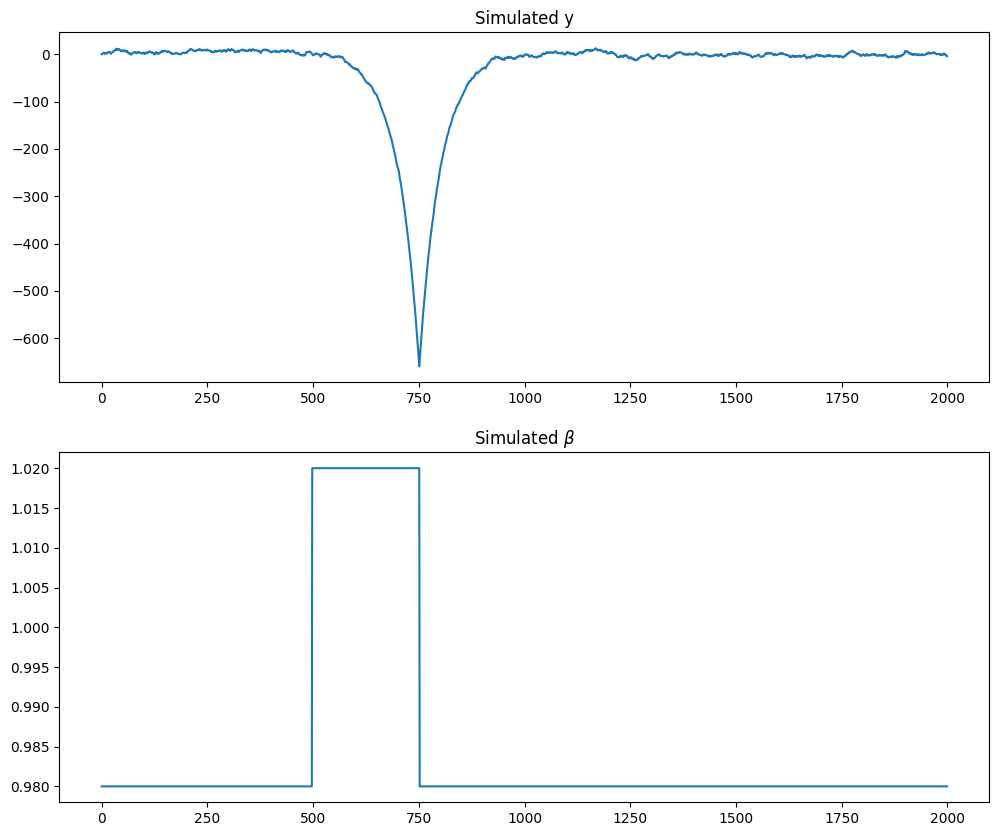

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (12,10))
ax[0].plot(y, label = "y")
ax[0].set_title("Simulated y")
ax[1].plot(beta, label = r"$\beta$")
ax[1].set_title(r"Simulated $\beta$")
plt.show()

We then apply the `PSYBubble` class to the `y` series to identify the bubbles. We set $r_0 = 0.18$ and $\delta = 1.0$ to calculate the minimum bubble duration. 

To speed up the calculations, we set $rstep = 0.01$ so the function only looks at $0.01$ increments of the threshold $r$. The significance level $\alpha$ is set to $0.05$ and we use 2000 simulations to compute the critical values.

In [3]:
from psytest import PSYBubbles

nreps = 2_000
psy = PSYBubbles(y, r0=0.18, delta=1.0, rstep=1 / 100)

# Calculate the test statistic
stat = psy.teststat()
# Calculate the critical value
cval = psy.critval(test_size=0.05)

We now plot the test statistic and critical values for evaluation.

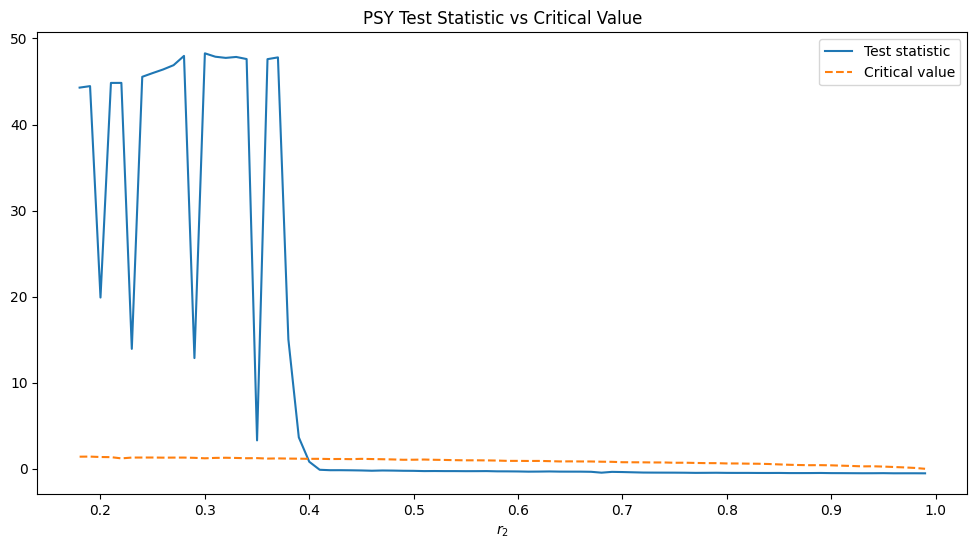

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax.plot(stat.keys(), stat.values(), label = "Test statistic")
ax.plot(cval.keys(), cval.values(), label = "Critical value", linestyle = "--")
ax.legend()
ax.set(
    xlabel = r"$r_2$",
    title = "PSY Test Statistic vs Critical Value",
)
plt.show()

Finally, we find the bubble indexes using these values and plot the results. The shaded area in the figure below indicate the periods in which the test has identified a bubble. We can see that, as expected, the test identifies the periods in which the process is in state $\beta=1.02$ as bubbles although not perfectly.

In [10]:
bubbles = psy.find_bubbles(alpha = 0.05)

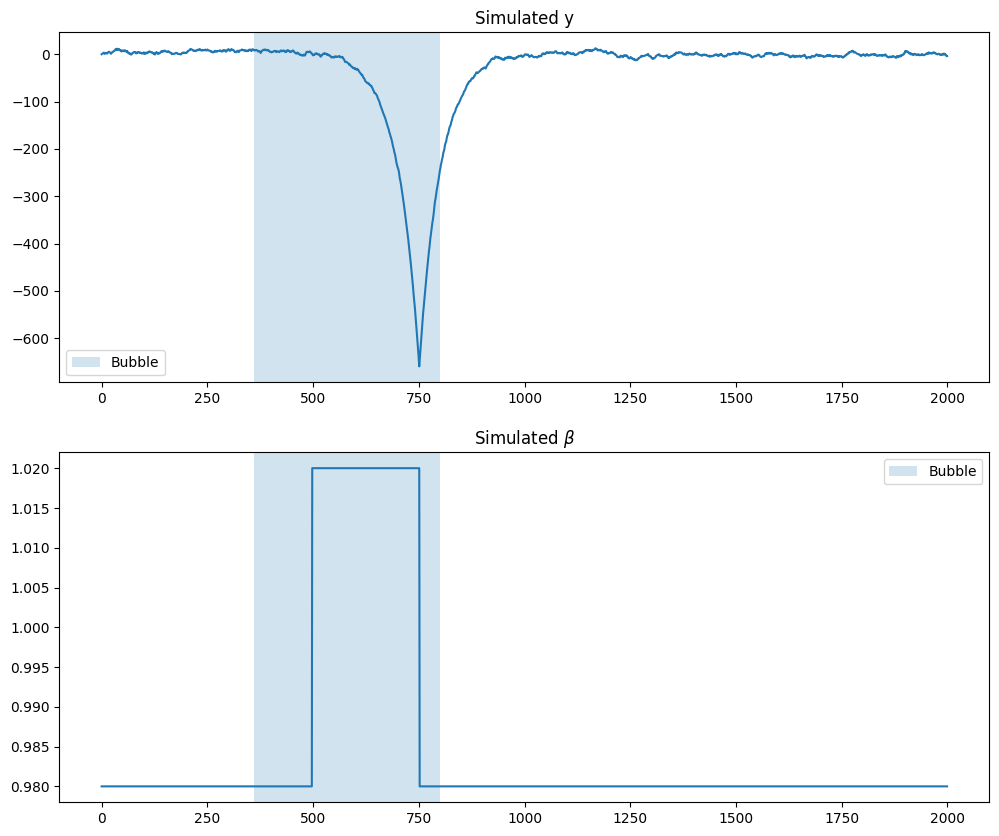

In [11]:

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax[0].plot(y)
ax[1].plot(beta)
for start, end in bubbles:
    ax[0].axvspan(start, end, alpha=0.2, label = "Bubble")
    ax[1].axvspan(start, end, alpha=0.2, label = "Bubble")
ax[0].set_title("Simulated y")
ax[0].legend()
ax[1].set_title(r"Simulated $\beta$")
ax[1].legend()
plt.show()